Certain things are not adequately described. Several missing information had needed to be filled in. Data set 1 was usable after all, being easily transformed, calculated according to our need; this data was ready to create questions. 

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Book3.csv')

# data has some point that are invalid to print
df.fillna(0, inplace=True)
df.replace('*', 0, inplace=True)

# converting all values to int
df["Pct. of faculty with Ph.D.'s"] = df["Pct. of faculty with Ph.D.'s"].astype(int)
df['Student/faculty ratio'] = df['Student/faculty ratio'].astype(int)
df['Average Combined SAT score'] = df['Average Combined SAT score'].astype(int)
df['Average ACT score'] = df['Average ACT score'].astype(int)
df['Graduation rate'] = df['Graduation rate'].astype(int)
df['Instructional expenditure per student'] = df['Instructional expenditure per student'].astype(int)
df['Number of fulltime undergraduates'] = df['Number of fulltime undergraduates'].astype(int)

1. Which region or state has the highest number of top grade colleges?


<ipython-input-196-e46c1136a953>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



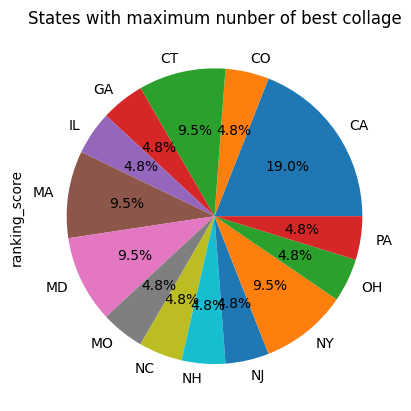

In [196]:
# My Ranking Criteria

# Pct. of faculty with Ph.D.'s - 15%
# Student/faculty ratio - 20%
# Average Combined SAT score - 15%
# Average ACT score - 15%
# Graduation rate - 20%
# Instructional expenditure per student - 10%
# Number of fulltime undergraduates - 5%

# detrmining rank scores of collages
df['ranking_score'] = (15 * df["Pct. of faculty with Ph.D.'s"])+(20 * df["Student/faculty ratio"])+(15 * df['Average ACT score'])+(15 * df['Average Combined SAT score'])+(20 * df['Graduation rate'])+(10 * df['Instructional expenditure per student'])+(5 * df['Number of fulltime undergraduates'])

df['ranking_score'] = df['ranking_score'].astype(int)

top = df.sort_values('ranking_score', ascending=False)

top_21 = top.head(21)
top_21['ranking_score'] = top_21['ranking_score'].astype(int)

reset = top_21.reset_index()[['ranking_score', 'State (postal code)']]
states_counts = reset.groupby('State (postal code)')['ranking_score'].count()
# pie plot
states_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('States with maximum nunber of best collage')
plt.show()

2. What is the average cost of living in each state for a student? Subsequently, for each state selected by the user, plot the Average Cost of Living for each college for both types of students (out-of-state and in-state).


Enter a state code CA


<ipython-input-197-fb1e929017f2>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-197-fb1e929017f2>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



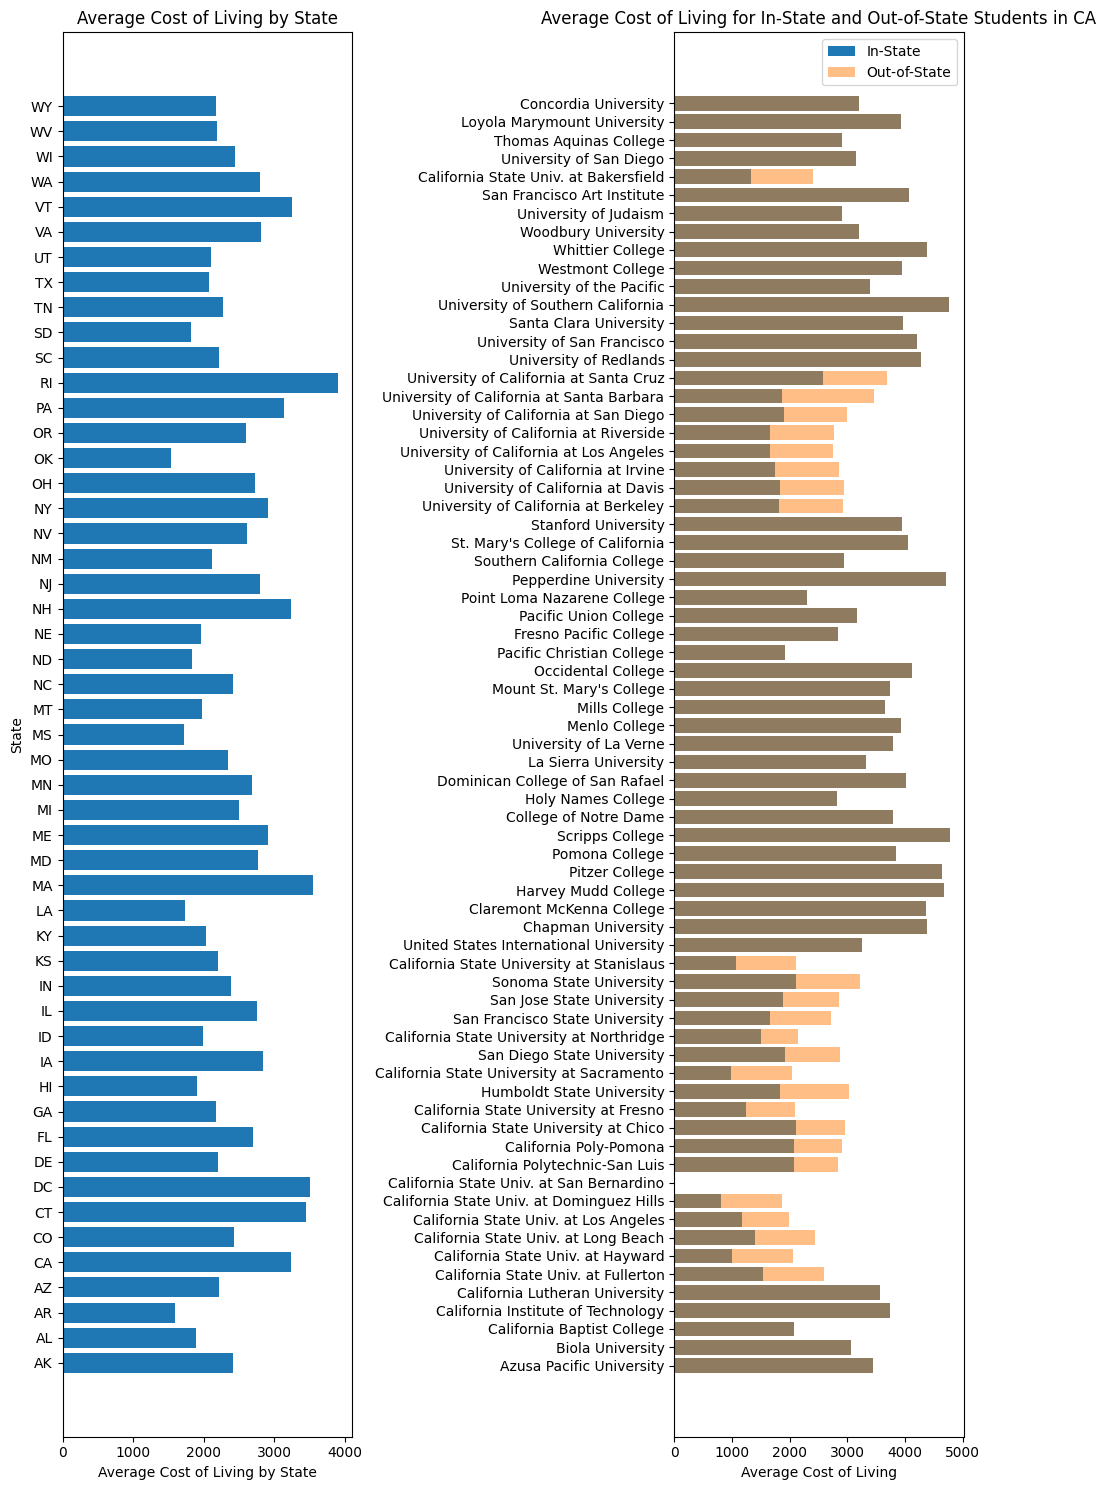

In [197]:
numeric_cols = ["In-state tuition", "Out-of-state tuition", "Room and board costs", "Room costs", "Board costs", "Additional fees", "Estimated book costs", "Estimated personal spending"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# creating a new column "Average Cost of Living"
df["Average Cost of Living"] = (df["Out-of-state tuition"] + df["Room and board costs"] + df["Room costs"] + df["Board costs"] + df["Additional fees"] + df["Estimated book costs"] + df["Estimated personal spending"]) / 7

grouped_data = df.groupby("State (postal code)")["Average Cost of Living"].mean().reset_index()

# histogram plot
fig, axs = plt.subplots(1, 2, figsize=(10, 15))
axs[0].barh(grouped_data["State (postal code)"], grouped_data["Average Cost of Living"])
axs[0].set_xlabel("Average Cost of Living by State")
axs[0].set_ylabel("State")
axs[0].set_title("Average Cost of Living by State")

# input a state code
state_code = input("Enter a state code ")

# include only colleges in the inputed state
state_data = df[df["State (postal code)"] == state_code]

state_data["In-state"] = (df["In-state tuition"] + df["Room and board costs"] + df["Room costs"] + df["Board costs"] + df["Additional fees"] + df["Estimated book costs"] + df["Estimated personal spending"]) / 7
state_data["Out-of-state"] = (df["Out-of-state tuition"] + df["Room and board costs"] + df["Room costs"] + df["Board costs"] + df["Additional fees"] + df["Estimated book costs"] + df["Estimated personal spending"]) / 7

# bar plot
axs[1].barh(state_data.iloc[:, 1].astype(str), state_data["In-state"], label="In-State")
axs[1].barh(state_data.iloc[:, 1].astype(str), state_data["Out-of-state"], alpha=0.5, label="Out-of-State")
axs[1].set_xlabel("Average Cost of Living")
axs[1].set_title(f"Average Cost of Living for In-State and Out-of-State Students in {state_code}")
axs[1].legend()

plt.tight_layout()
plt.show()

3. Could you figure out the likelihood that you submitted an application and were chosen, and What should be the pattern of this probability from top to bottom collages? 		
4. What are the grade requirements for each college?  Observe the trend of marks required for different colleges (arranged from top to bottom)?


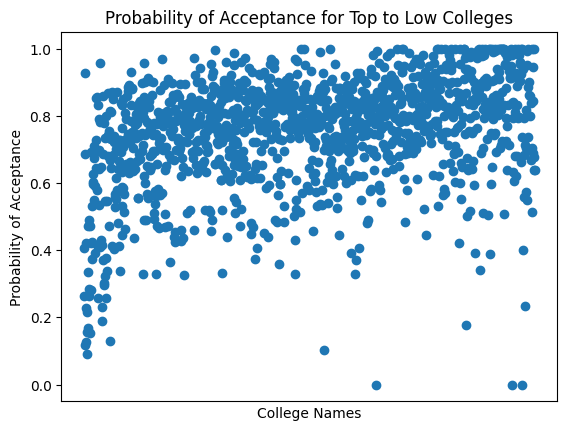

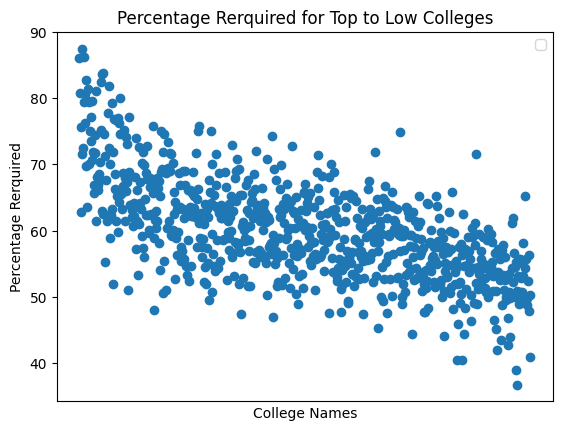

In [198]:
# probability of acceptance for each college
top['Probability of acceptance'] = top['Number of applicants accepted'] / top['Number of applications received']

subset_size = 0

# scatter plot
plt.scatter(top['College name'], top['Probability of acceptance'])
plt.xticks(top['College name'].iloc[:subset_size])
plt.xlabel('College Names')
plt.ylabel('Probability of Acceptance')
plt.title('Probability of Acceptance for Top to Low Colleges')
plt.show()

# top_100 = top.head(100)
# # less_prob = top.sort_values('Probability of acceptance', ascending=True)
# # top_100 = less_prob.head(100)

# # bar chart
# plt.figure(figsize=(20,10))
# plt.bar(top_100['College name'], top_100['Probability of acceptance'])
# plt.xticks(rotation=90)
# plt.xlabel('College Name')
# plt.ylabel('Probability of Acceptance')
# plt.title('Probability of Acceptance for Top Colleges')
# plt.show()

# Percentage Rerquired for each college
top['Percentage Rerquired'] = ((top['Average Combined SAT score']+top['Average ACT score']) / 1636)*100

# remove values with 0 so that plot get clear
top_filter = top.loc[top['Percentage Rerquired'] > 2]

# for not print all collage names as they looks bad
subset = 0

# scatter chart
plt.scatter(top_filter['College name'], top_filter['Percentage Rerquired'])
plt.xticks(top_filter['College name'].iloc[:subset])
plt.xlabel('College Names')
plt.ylabel('Percentage Rerquired')
plt.title('Percentage Rerquired for Top to Low Colleges')
plt.legend()
plt.show()

5. How are Public Colleges different from Private Colleges?


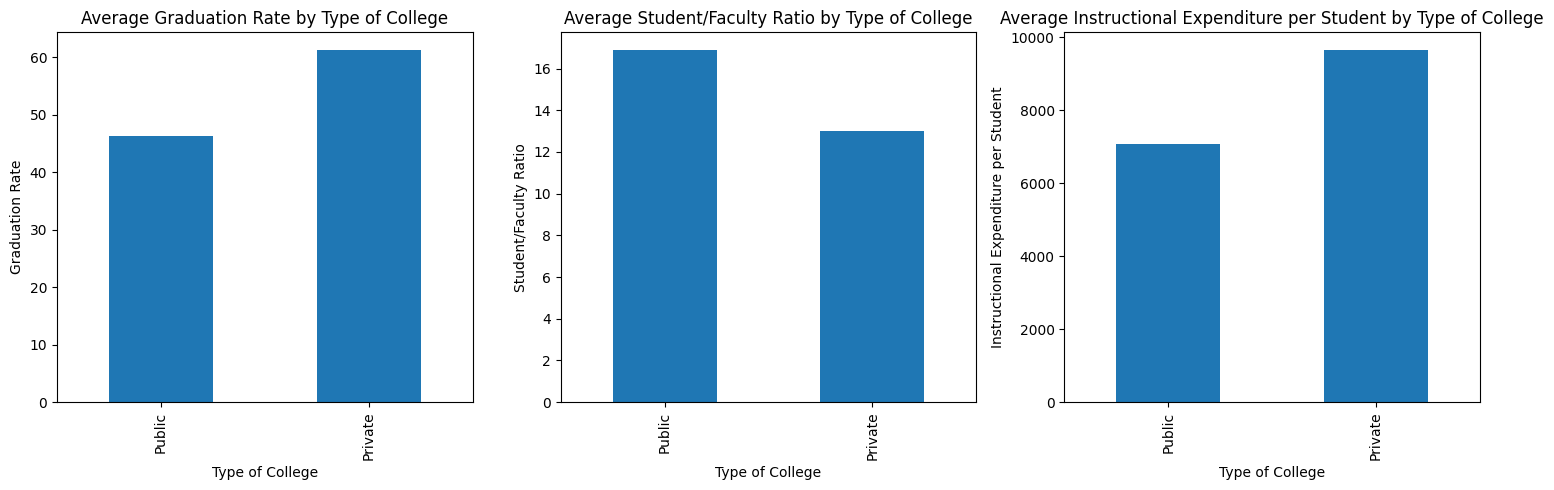

In [199]:
# figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# bar plot for graduation rate
df.groupby('Public/private indicator (public=1, private=2)')['Graduation rate'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_xticklabels(['Public', 'Private'])
axs[0].set_xlabel('Type of College')
axs[0].set_ylabel('Graduation Rate')
axs[0].set_title('Average Graduation Rate by Type of College')

# bar plot for student/faculty ratio
df.groupby('Public/private indicator (public=1, private=2)')['Student/faculty ratio'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_xticklabels(['Public', 'Private'])
axs[1].set_xlabel('Type of College')
axs[1].set_ylabel('Student/Faculty Ratio')
axs[1].set_title('Average Student/Faculty Ratio by Type of College')

# bar plot for instructional expenditure per student
df.groupby('Public/private indicator (public=1, private=2)')['Instructional expenditure per student'].mean().plot(kind='bar', ax=axs[2])
axs[2].set_xticklabels(['Public', 'Private'])
axs[2].set_xlabel('Type of College')
axs[2].set_ylabel('Instructional Expenditure per Student')
axs[2].set_title('Average Instructional Expenditure per Student by Type of College')

plt.tight_layout()
plt.show()

Certain things are not adequately described. Several missing information had needed to be filled in.
 
Data set 2 was usable after all, being easily transformed, calculated according to our need; this data was ready to create questions. 

In [200]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the data into a pandas dataframe
df2 = pd.read_csv('/content/Book21.csv')

# data has some point that are invalid to print
df2.fillna(0, inplace=True)
df2.replace('*', 0, inplace=True)

df2['Average salary - full professors'] = pd.to_numeric(df2['Average salary - full professors'], errors='coerce')
df2['Average salary - associate professors'] = pd.to_numeric(df2['Average salary - associate professors'], errors='coerce')
df2['Average salary - assistant professors'] = pd.to_numeric(df2['Average salary - assistant professors'], errors='coerce')
df2['Average salary - all ranks'] = pd.to_numeric(df2['Average salary - all ranks'], errors='coerce')

# print(df2.columns)

6. Does the state influence teachers' salaries?		
7. Are there colleges which do not follow minimum wage law?


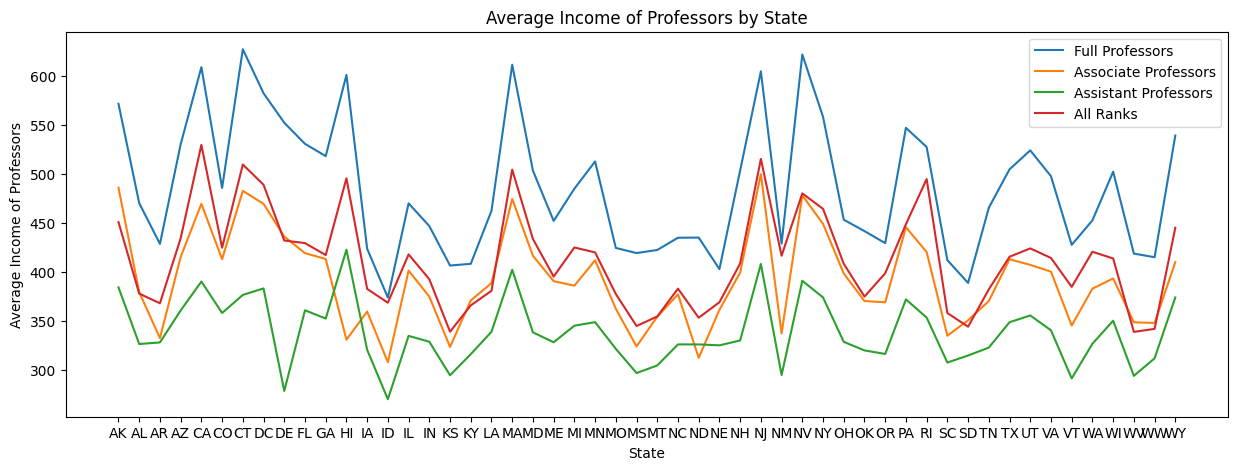

Professor Rank,Average salary - all ranks,Average salary - assistant professors,Average salary - associate professors
College name,,,
Benedict College,NaN,241.0,NaN
Bethany College,NaN,248.0,NaN
Calumet College of St.Joseph,NaN,235.0,NaN
Central Wesleyan College,NaN,214.0,247.0
Grace College,NaN,228.0,NaN
Newberry College,NaN,243.0,NaN
Saint Mary-of-the-Woods Coll,232.0,199.0,234.0
Southern C.Seventh-Day Advts,NaN,249.0,NaN
Tougaloo College,NaN,244.0,NaN


In [201]:
import pandas as pd
import matplotlib.pyplot as plt

df2['Avg Salary - All Professors'] = df2[['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks']].mean(axis=1)
df2['Avg Salary - All Professors'] = pd.to_numeric(df2['Avg Salary - All Professors'], errors='coerce')

# Group the data by state and calculate the mean income for each category of professor
# state_wise_data = df2.groupby('State (postal code)')[['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks']].mean().reset_index()
state_wise_data = df2.groupby('State (postal code)')[['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks', 'Avg Salary - All Professors']].agg({'Average salary - full professors':'mean', 'Average salary - associate professors':'mean', 'Average salary - assistant professors':'mean', 'Average salary - all ranks':'mean'}).reset_index()
# Plot a line graph of states vs income for each category of professor
plt.figure(figsize=(15,5))
plt.plot(state_wise_data['State (postal code)'], state_wise_data['Average salary - full professors'], label='Full Professors')
plt.plot(state_wise_data['State (postal code)'], state_wise_data['Average salary - associate professors'], label='Associate Professors')
plt.plot(state_wise_data['State (postal code)'], state_wise_data['Average salary - assistant professors'], label='Assistant Professors')
plt.plot(state_wise_data['State (postal code)'], state_wise_data['Average salary - all ranks'], label='All Ranks')
# plt.plot(state_wise_data['State (postal code)'], state_wise_data['Avg Salary - All Professors'], label='All Professors')

plt.xlabel('State')
plt.ylabel('Average Income of Professors')
plt.title('Average Income of Professors by State')
plt.legend()
plt.show()

df_less_250 = df2[(df2['Average salary - full professors'] < 250) | 
                       (df2['Average salary - associate professors'] < 250) |
                       (df2['Average salary - assistant professors'] < 250) |
                       (df2['Average salary - all ranks'] < 250)]

df_less_250 = df_less_250[(df_less_250[['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks']] != 0).all(axis=1)]

df_less_250 = df_less_250[['College name ', 'Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks']]
df_less_250 = pd.melt(df_less_250, id_vars=['College name '], var_name='Professor Rank', value_name='Salary')
df_less_250 = df_less_250[df_less_250['Salary'] < 250]

df_less_250.pivot(index='College name ', columns='Professor Rank', values='Salary')

8. Show in pie plot total number of different types of collage (I, IIA, IIB) and also in that same calculate the percentage of number of each professor ('Number of faculty - all ranks', 'Number of associate professors', 'Number of assistant professors', 'Number of instructors') in that particular type of collage.


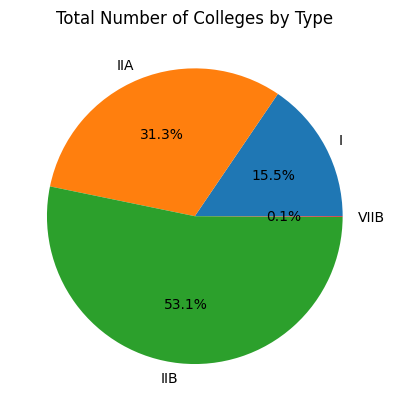

In [202]:
# Group colleges by type and count the number of colleges in each group
college_counts = df2.groupby('Type  (I, IIA, or IIB)')['FICE(FEDERAL ID NUMBER)'].count()

# Plot the pie chart
plt.pie(college_counts, labels=college_counts.index, autopct='%1.1f%%')
plt.title('Total Number of Colleges by Type')
plt.show()

9. Display the states of America together with their postal codes and the number of each sort of institute that interests them.

In [207]:
import plotly.graph_objs as go

state_col = pd.concat([df2['State (postal code)'], df2['State (postal code)']])
data = pd.DataFrame({'State (postal code)': state_col.unique()})

college_counts = df2.groupby(['State (postal code)', 'Type  (I, IIA, or IIB)'])['FICE(FEDERAL ID NUMBER)'].count()
college_counts = college_counts.unstack(level=1, fill_value=0)

text = []
for state in data['State (postal code)']:
    text.append(f"State: {state}<br>Type 1: {college_counts.loc[state, 'I']}<br>Type 2A: {college_counts.loc[state, 'IIA']}<br>Type 2B: {college_counts.loc[state, 'IIB']}")

fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    locations = data['State (postal code)'],
    text = text,
    marker = dict(
        size = 10,
        color = 'blue',
        line = dict(width=0.5, color='rgb(40,40,40)'),
        ),
    ))

fig.update_layout(
    title = 'US State Codes',
    geo_scope = 'usa',
    width = 1000,
    height = 400
    )

fig.show()

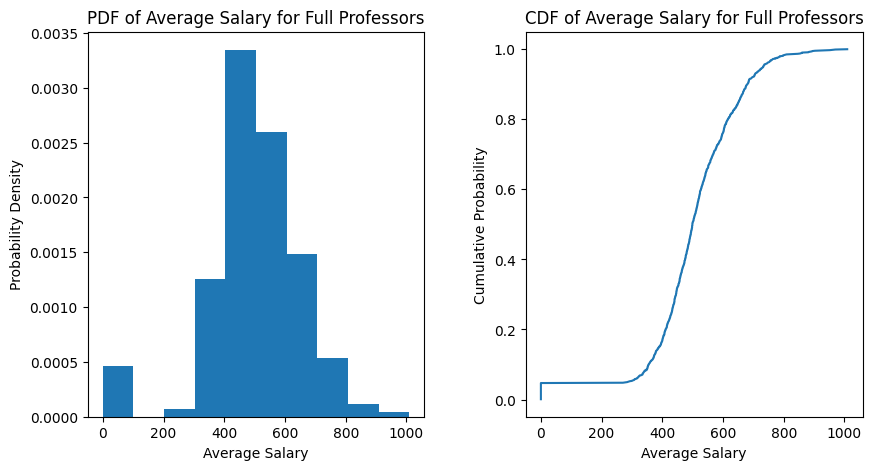

In [205]:
import numpy as np

# Filter the DataFrame to include only data for full professors
full = df2[df2['Number of full professors'] > 0]

# Calculate CDF of the average salary for full professors
x = np.sort(full['Average salary - full professors'])
y = np.arange(1, len(x) + 1) / len(x)

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot the PDF and CDF
ax1.hist(full['Average salary - full professors'], density=True)
ax1.set(title='PDF of Average Salary for Full Professors', xlabel='Average Salary', ylabel='Probability Density')

ax2.plot(x, y)
ax2.set(title='CDF of Average Salary for Full Professors', xlabel='Average Salary', ylabel='Cumulative Probability')

plt.subplots_adjust(wspace=0.3)
plt.show()